In [1]:
import bioread
import pandas as pd
from pyPPG import PPG, Fiducials, Biomarkers
from pyPPG.datahandling import load_data, plot_fiducials, save_data
import pyPPG.preproc as PP
import pyPPG.fiducials as FP
import pyPPG.biomarkers as BM
import pyPPG.ppg_sqi as SQI
import pyPPG
import matplotlib.pyplot as plt
import numpy as np
import sys
import json
import pandas as pd
import os

In [2]:
# read csv file
metadata1 = pd.read_csv('/Users/sahilsahu/Desktop/folders/Feature-Extraction/code/data/exp2/metadata.csv')
metadata2 = pd.read_csv('/Users/sahilsahu/Desktop/folders/Feature-Extraction/code/data/exp3/metadata.csv')

In [3]:
sugar1 = metadata1['blood glucose'].values
sugar2 = metadata2['blood glucose'].values

age1 = metadata1['age'].values
age2 = metadata2['age'].values

sex1 = metadata1['gender'].values
sex2 = metadata2['sex'].values

height1 = metadata1['height'].values
height2 = metadata2['height'].values

weight1 = metadata1['weight'].values
weight2 = metadata2['weight'].values

diabetes1 = metadata1['diabetes medication'].values
diabetes2 = metadata2['diabetes'].values

names = metadata1['name'].values
ids = metadata2['person_id'].values

In [4]:
ppg_data1 = []
for i in range(0,  len(names)):
    filepath = "/Users/sahilsahu/Desktop/folders/Feature-Extraction/code/data/exp2/ppg/acq"
    filepath += "/" + names[i] + ".acq"
    
    # if(os.path.exists(filepath) == False and not np.isnan(sugar[i])):
    #     print("File not found: ", names[i])
    if not np.isnan(sugar1[i]):
        acq_data =  bioread.read_file(filepath)
        ndata = {
                "name" : names[i],
                "sugar" : sugar1[i],
                "age" : age1[i],
                "height" : height1[i],
                "weight" : weight1[i],
                "diabetes" : diabetes1[i],
                "ppg_raw" : acq_data.channels[0].data,
                "ppg_signal" : None
                
        }
        ppg_data1.append(ndata)

In [5]:
ppg_data2 = []
for i in range(0,  len(ids)):
    filepath = "/Users/sahilsahu/Desktop/folders/Feature-Extraction/code/data/exp3/ppg/acq"
    filepath += "/P" + str(ids[i]) + ".acq"
    
    # if(os.path.exists(filepath) == False and not np.isnan(sugar[i])):
    #     print("File not found: ", names[i])
    if not np.isnan(sugar2[i]):
        acq_data =  bioread.read_file(filepath)
        ndata = {
                "name" : "P" + str(ids[i]),
                "sugar" : sugar2[i],
                "age" : age2[i],
                "height" : height2[i],
                "weight" : weight2[i],
                "diabetes" : diabetes2[i],
                "ppg_raw" : acq_data.channels[0].data,
                "ppg_signal" : None
                
        }
        ppg_data2.append(ndata)

In [6]:
for i in range(0, len(ppg_data1)):
    csv_path = "/Users/sahilsahu/Desktop/folders/Feature-Extraction/code/data/exp2/ppg/csv"
    csv_path += "/" + ppg_data1[i]['name'] + ".csv"
    ppg_data1[i]['ppg_signal'] = load_data(data_path=csv_path, start_sig=1, fs=2000, end_sig=-1)

In [7]:
for i in range(0, len(ppg_data2)):
    csv_path = "/Users/sahilsahu/Desktop/folders/Feature-Extraction/code/data/exp3/ppg/csv"
    csv_path += "/" + ppg_data2[i]['name'] + ".csv"
    ppg_data2[i]['ppg_signal'] = load_data(data_path=csv_path, start_sig=1, fs=2000, end_sig=-1)

In [8]:
signals_list1 = []
for i in range(0, len(ppg_data1)):
    signals_list1.append(ppg_data1[i]['ppg_signal'])

In [9]:
signals_list2 = []
for i in range(0, len(ppg_data2)):
    signals_list2.append(ppg_data2[i]['ppg_signal'])

In [10]:
for signal in signals_list1:
    prep = PP.Preprocess(fL=signal.fL, fH=signal.fH, order=signal.order, sm_wins=signal.sm_wins)
    signal.ppg, signal.vpg, signal.apg, signal.jpg = prep.get_signals(s=signal)


In [11]:
for signal in signals_list2:
    prep = PP.Preprocess(fL=signal.fL, fH=signal.fH, order=signal.order, sm_wins=signal.sm_wins)
    signal.ppg, signal.vpg, signal.apg, signal.jpg = prep.get_signals(s=signal)


In [12]:
for signal in signals_list1:
    corr_on = ['on', 'dn', 'dp', 'v', 'w', 'f']
    correction=pd.DataFrame()
    correction.loc[0, corr_on] = True
    signal.correction=correction


signals_list_ppg_class1 = []

for signal in signals_list1:
    signals_list_ppg_class1.append(PPG(signal))

In [13]:
for signal in signals_list2:
    corr_on = ['on', 'dn', 'dp', 'v', 'w', 'f']
    correction=pd.DataFrame()
    correction.loc[0, corr_on] = True
    signal.correction=correction


signals_list_ppg_class2 = []

for signal in signals_list2:
    signals_list_ppg_class2.append(PPG(signal))

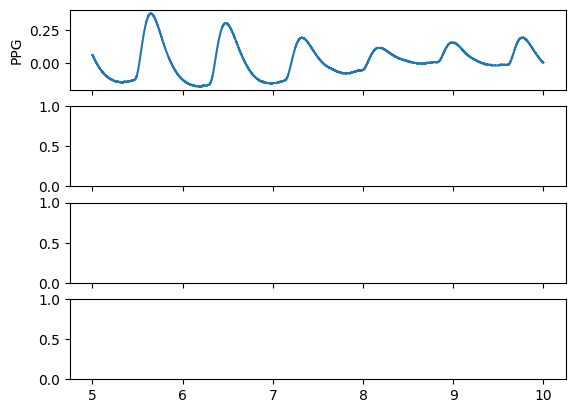

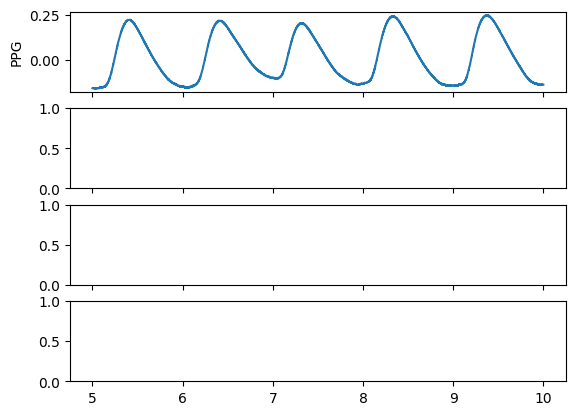

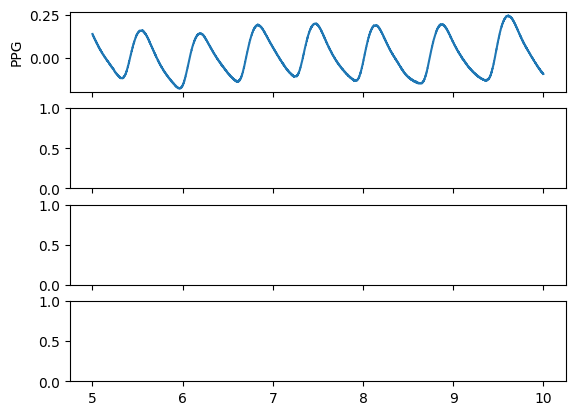

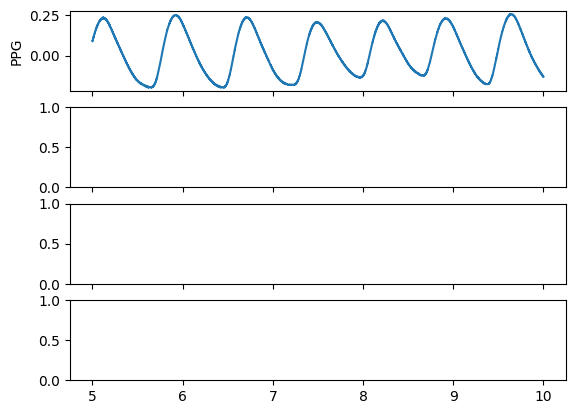

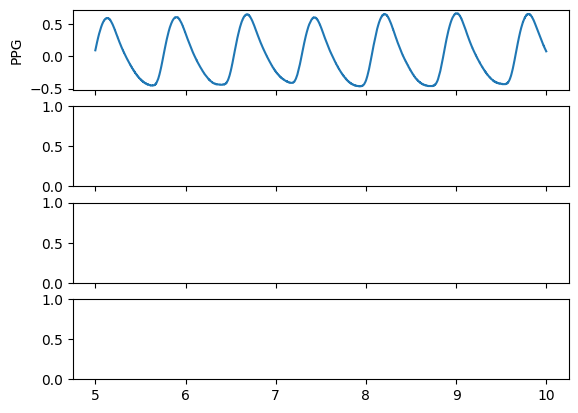

In [14]:
# 5 random signals
indices = np.random.randint(0, len(signals_list_ppg_class1), 5)
for i in indices:
    signal = signals_list_ppg_class1[i]
    
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex = True, sharey = False)

    # create time vector
    t = np.arange(0, len(signal.ppg))/signal.fs

    # plot filtered PPG signal
    ax1.plot(t[10000:20000], signal.ppg[10000:20000])
    ax1.set(xlabel = '', ylabel = 'PPG')
    
    # show plot
    plt.show()
    

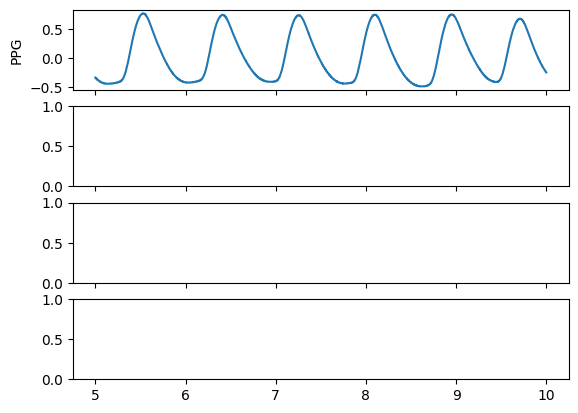

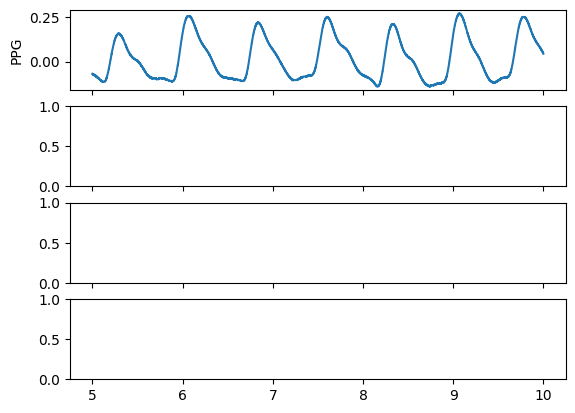

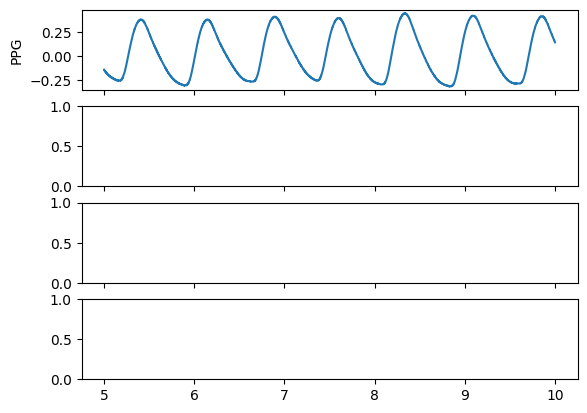

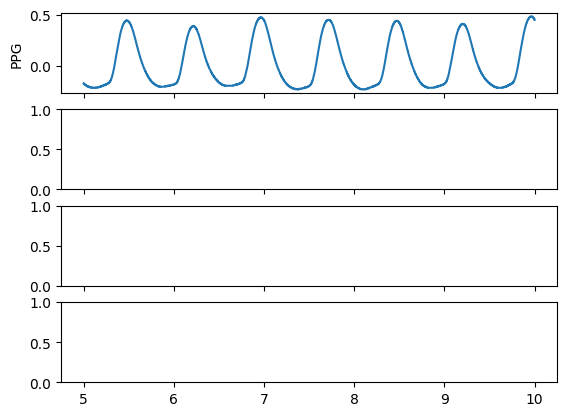

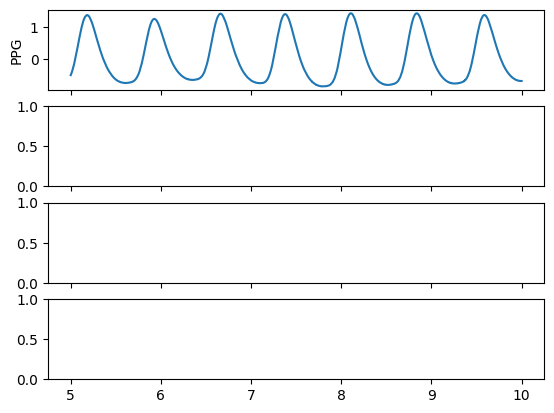

In [15]:
# 5 random signals
indices = np.random.randint(0, len(signals_list_ppg_class2), 5)
for i in indices:
    signal = signals_list_ppg_class2[i]
    
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex = True, sharey = False)

    # create time vector
    t = np.arange(0, len(signal.ppg))/signal.fs

    # plot filtered PPG signal
    ax1.plot(t[10000:20000], signal.ppg[10000:20000])
    ax1.set(xlabel = '', ylabel = 'PPG')
    
    # show plot
    plt.show()
    

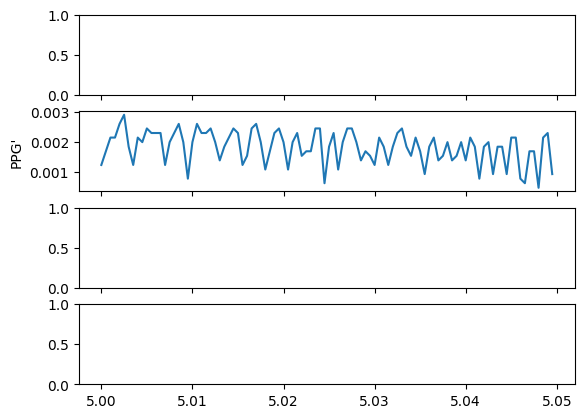

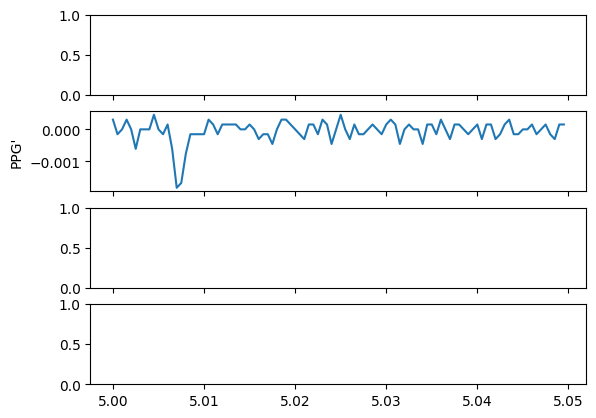

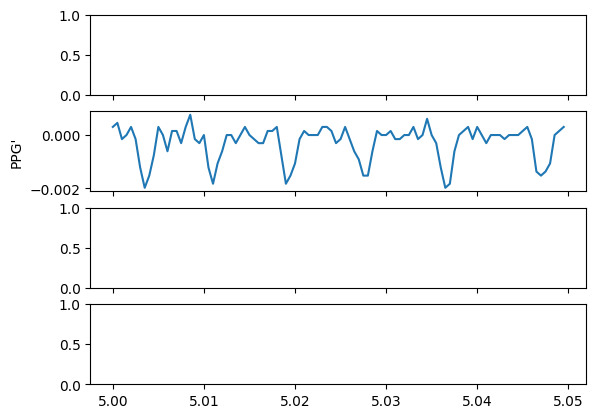

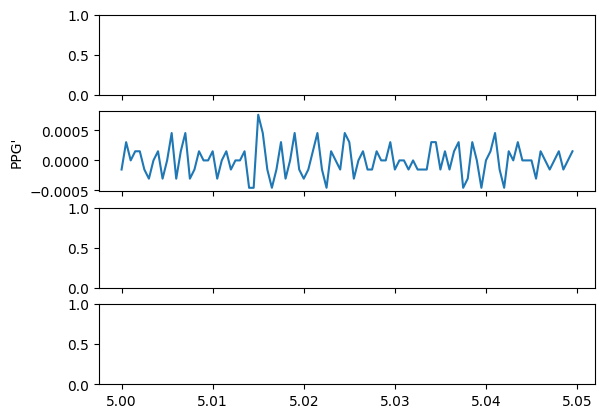

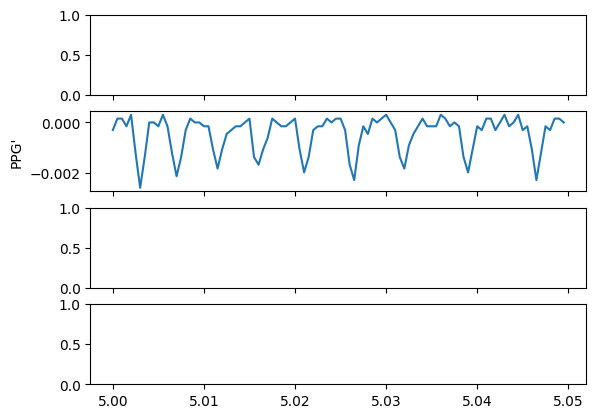

In [16]:
indices = np.random.randint(0, len(signals_list_ppg_class1), 5)
for i in indices:
    signal = signals_list_ppg_class1[i]

    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex = True, sharey = False)

    # create time vector
    t = np.arange(0, len(signal.ppg))/signal.fs

    # plot first derivative
    ax2.plot(t[10000:10100], signal.vpg[10000:10100])
    ax2.set(xlabel = '', ylabel = 'PPG\'')

    # show plot
    plt.show()
    

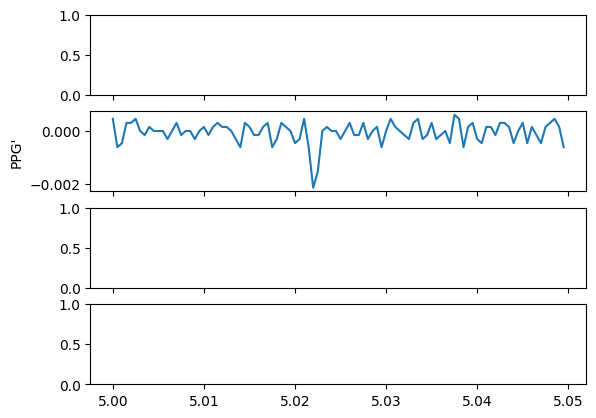

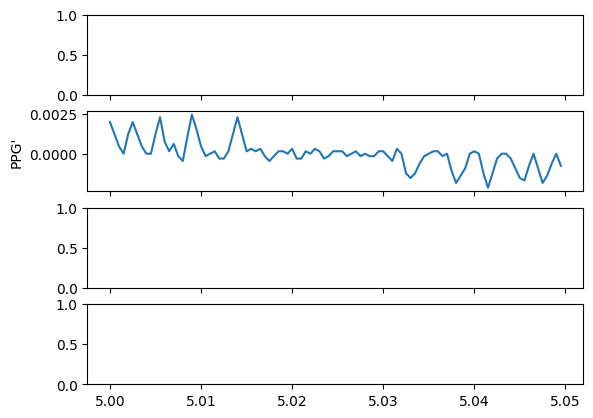

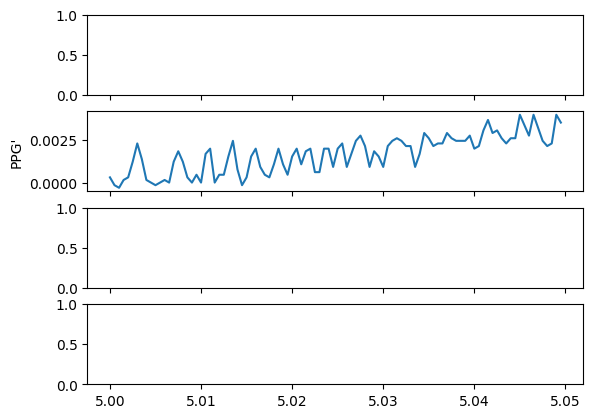

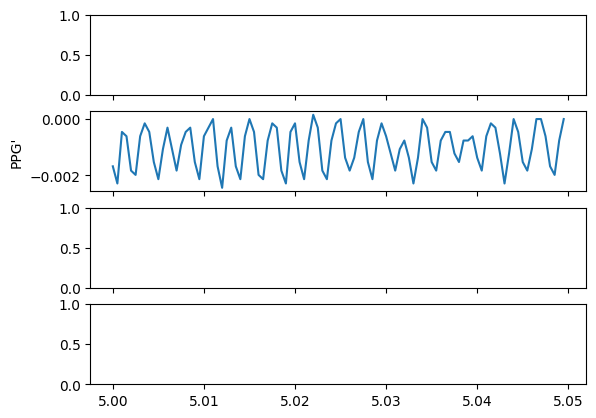

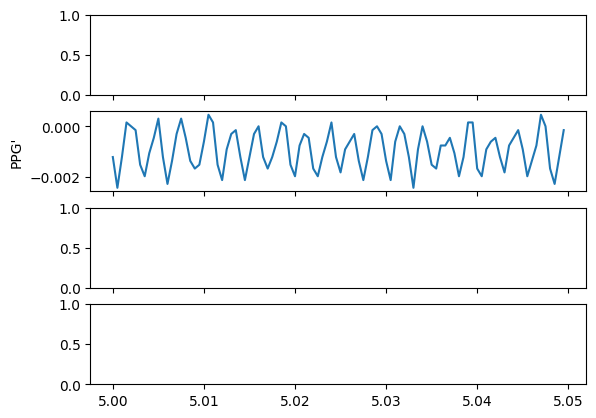

In [17]:
indices = np.random.randint(0, len(signals_list_ppg_class2), 5)
for i in indices:
    signal = signals_list_ppg_class2[i]

    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex = True, sharey = False)

    # create time vector
    t = np.arange(0, len(signal.ppg))/signal.fs

    # plot first derivative
    ax2.plot(t[10000:10100], signal.vpg[10000:10100])
    ax2.set(xlabel = '', ylabel = 'PPG\'')

    # show plot
    plt.show()
    

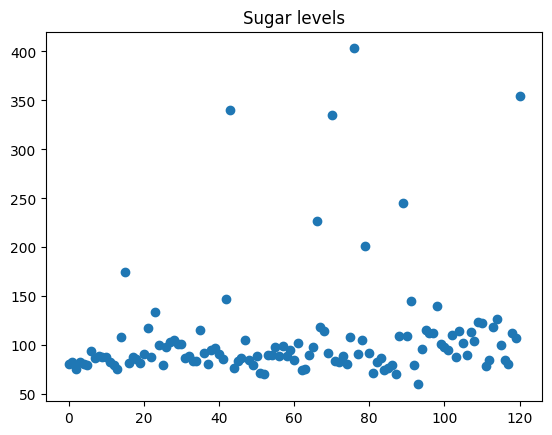

In [18]:
# plot sugar levels as histogram
sugar_levels = []
for i in range(0, len(ppg_data1)):
    sugar_levels.append(ppg_data1[i]['sugar'])
    
    
for i in range(0, len(ppg_data2)):
    sugar_levels.append(ppg_data2[i]['sugar'])
    
plt.plot(sugar_levels, 'o')
plt.title('Sugar levels')
plt.show()



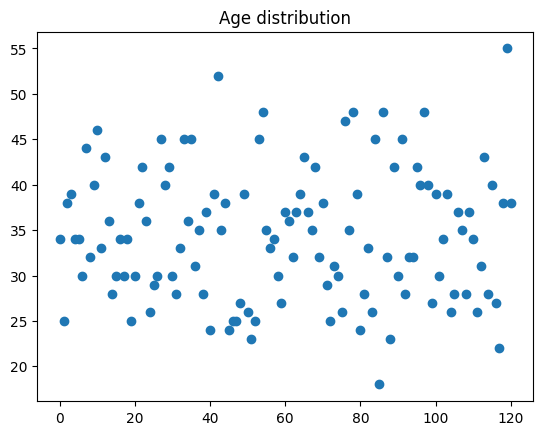

In [19]:
# plot age as histogram
age = []
for i in range(0, len(ppg_data1)):
    age.append(ppg_data1[i]['age'])
    
for i in range(0, len(ppg_data2)):
    age.append(ppg_data2[i]['age'])
    
plt.plot(age, 'o')
plt.title('Age distribution')
plt.show()


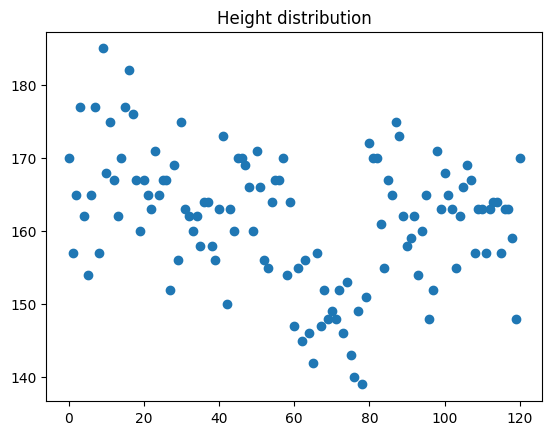

In [20]:
# plot height as histogram
height = []
for i in range(0, len(ppg_data1)):
    height.append(ppg_data1[i]['height'])
    
for i in range(0, len(ppg_data2)):
    height.append(ppg_data2[i]['height'])
    
plt.plot(height, 'o')
plt.title('Height distribution')
plt.show()


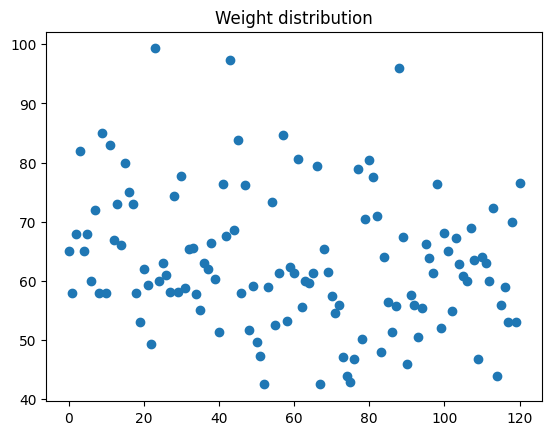

In [21]:
# plot weight as histogram
weight = []
for i in range(0, len(ppg_data1)):
    weight.append(ppg_data1[i]['weight'])
    
for i in range(0, len(ppg_data2)):
    weight.append(ppg_data2[i]['weight'])
    
plt.plot(weight, 'o')
plt.title('Weight distribution')
plt.show()

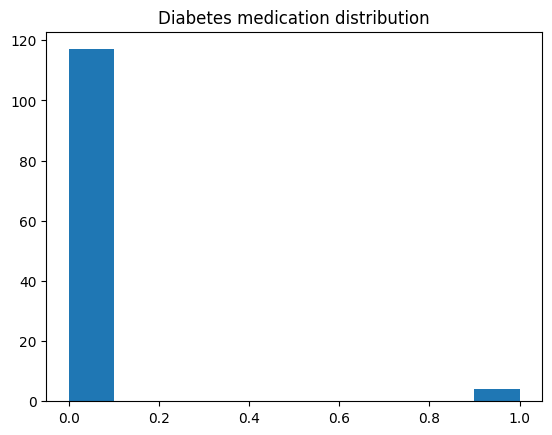

In [22]:
# plot diabetes medication as histogram
diabetes = []
for i in range(0, len(ppg_data1)):
    if ppg_data1[i]['diabetes'] == 'yes' or ppg_data1[i]['diabetes'] == 'Yes':
        diabetes.append(1)
    else:
        diabetes.append(0)

for i in range(0, len(ppg_data2)):
    if ppg_data2[i]['diabetes'] == 'yes' or ppg_data2[i]['diabetes'] == 'Yes':
        diabetes.append(1)
        
    else:
        diabetes.append(0)
    
plt.hist(diabetes)
plt.title('Diabetes medication distribution')
plt.show()

In [23]:
import seaborn as sns


In [35]:
data = pd.read_csv('/Users/sahilsahu/Desktop/folders/Feature-Extraction/code/data/exp_2_3_dataset.csv')

data.head()

,Tpi_mean,Tpi_median,Tpi_std,Tpi_percentile_25,Tpi_percentile_75,Tpi_iqr,Tpi_skew,Tpi_kurtosis,Tpi_mad,Tpp_mean,...,Asp/(Tpi-Tsp)_percentile_75,Asp/(Tpi-Tsp)_iqr,Asp/(Tpi-Tsp)_skew,Asp/(Tpi-Tsp)_kurtosis,Asp/(Tpi-Tsp)_mad,age,height,weight,diabetes,sugar
0,0.761934,0.7615,0.030023,0.738625,0.78300,0.044375,-0.123669,-0.358012,0.024509,0.761187,...,0.918094,0.065496,0.935396,1.750709,0.042687,38,165,59.3,0,117.24
1,0.775829,0.7735,0.059216,0.732750,0.81725,0.084500,0.024998,-0.228823,0.048021,0.774923,...,1.561568,0.229315,0.061885,-0.006827,0.134129,42,163,49.4,0,88.19
2,0.735244,0.7470,0.051358,0.705375,0.76725,0.061875,-0.617952,0.061125,0.040331,0.735061,...,0.593492,0.073333,0.016122,0.662910,0.045611,36,171,99.3,0,134.05
3,0.767885,0.7650,0.040333,0.740500,0.79300,0.052500,2.104113,12.705569,0.029768,0.765494,...,1.160484,0.251324,0.051974,-1.035210,0.128208,26,165,60.0,0,100.31
4,0.710685,0.7090,0.074379,0.670250,0.74700,0.076750,4.142105,36.662932,0.047204,0.710779,...,1.624034,0.370440,1.154624,0.991969,0.279618,29,167,63.0,0,79.58


In [36]:
# drop nan and inf values
data = data.replace([np.inf, -np.inf], np.nan)

In [37]:
data.head()

,Tpi_mean,Tpi_median,Tpi_std,Tpi_percentile_25,Tpi_percentile_75,Tpi_iqr,Tpi_skew,Tpi_kurtosis,Tpi_mad,Tpp_mean,...,Asp/(Tpi-Tsp)_percentile_75,Asp/(Tpi-Tsp)_iqr,Asp/(Tpi-Tsp)_skew,Asp/(Tpi-Tsp)_kurtosis,Asp/(Tpi-Tsp)_mad,age,height,weight,diabetes,sugar
0,0.761934,0.7615,0.030023,0.738625,0.78300,0.044375,-0.123669,-0.358012,0.024509,0.761187,...,0.918094,0.065496,0.935396,1.750709,0.042687,38,165,59.3,0,117.24
1,0.775829,0.7735,0.059216,0.732750,0.81725,0.084500,0.024998,-0.228823,0.048021,0.774923,...,1.561568,0.229315,0.061885,-0.006827,0.134129,42,163,49.4,0,88.19
2,0.735244,0.7470,0.051358,0.705375,0.76725,0.061875,-0.617952,0.061125,0.040331,0.735061,...,0.593492,0.073333,0.016122,0.662910,0.045611,36,171,99.3,0,134.05
3,0.767885,0.7650,0.040333,0.740500,0.79300,0.052500,2.104113,12.705569,0.029768,0.765494,...,1.160484,0.251324,0.051974,-1.035210,0.128208,26,165,60.0,0,100.31
4,0.710685,0.7090,0.074379,0.670250,0.74700,0.076750,4.142105,36.662932,0.047204,0.710779,...,1.624034,0.370440,1.154624,0.991969,0.279618,29,167,63.0,0,79.58


In [38]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = data.columns
data = scaler.fit_transform(data)


In [39]:
data = pd.DataFrame(data, columns=cols)

In [40]:
data.head()

,Tpi_mean,Tpi_median,Tpi_std,Tpi_percentile_25,Tpi_percentile_75,Tpi_iqr,Tpi_skew,Tpi_kurtosis,Tpi_mad,Tpp_mean,...,Asp/(Tpi-Tsp)_percentile_75,Asp/(Tpi-Tsp)_iqr,Asp/(Tpi-Tsp)_skew,Asp/(Tpi-Tsp)_kurtosis,Asp/(Tpi-Tsp)_mad,age,height,weight,diabetes,sugar
0,0.346279,0.405583,0.032349,0.413221,0.382018,0.224806,0.064608,0.002152,0.065009,0.345606,...,0.186681,0.056223,0.362096,0.028983,0.069791,0.540541,0.565217,0.295775,0.0,0.166885
1,0.365931,0.425287,0.111573,0.402830,0.433128,0.501292,0.076738,0.003021,0.164222,0.365076,...,0.327874,0.266187,0.301032,0.011702,0.280349,0.648649,0.521739,0.121479,0.0,0.082189
2,0.308534,0.381773,0.090249,0.354411,0.358515,0.345392,0.024278,0.004970,0.131770,0.308574,...,0.115455,0.066267,0.297833,0.018287,0.076524,0.486486,0.695652,1.000000,0.0,0.215896
3,0.354697,0.411330,0.060328,0.416538,0.396941,0.280792,0.246378,0.089954,0.087199,0.351711,...,0.239867,0.294395,0.300339,0.001591,0.266713,0.216216,0.565217,0.308099,0.0,0.117525
4,0.273802,0.319376,0.152726,0.292284,0.328297,0.447890,0.412663,0.250975,0.160770,0.274155,...,0.341581,0.447062,0.377421,0.021523,0.615355,0.297297,0.608696,0.360915,0.0,0.057086


In [47]:
f1 = ['Tsys_percentile_25', 'Tdw33_mean', 'Asp_iqr', 'Tpw50/Tsp_mad',
       'Tpw75/Tsp_mad']
f2 = ['Tpp_skew', 'Tdia_median', 'Tsp_median', 'Tpw25_mad',
       'Tsys/Tdia_median', 'Tpw25/Tsp_std']
f3 = ['Tsw25_percentile_25', 'Tdw25_mad', 'Tdw90_mean', 'Tdw90_median',
       'Tpw75_mean', 'Asp_median', 'Tpw50/Tpi_mad']
f4 = ['Tpp_skew', 'Tsp_median', 'Tsw10_std', 'Tdw33_percentile_75',
       'Tdw90_mean', 'Tpw10_iqr', 'Tpw33_iqr', 'AUCsys_iqr']

<AxesSubplot: >

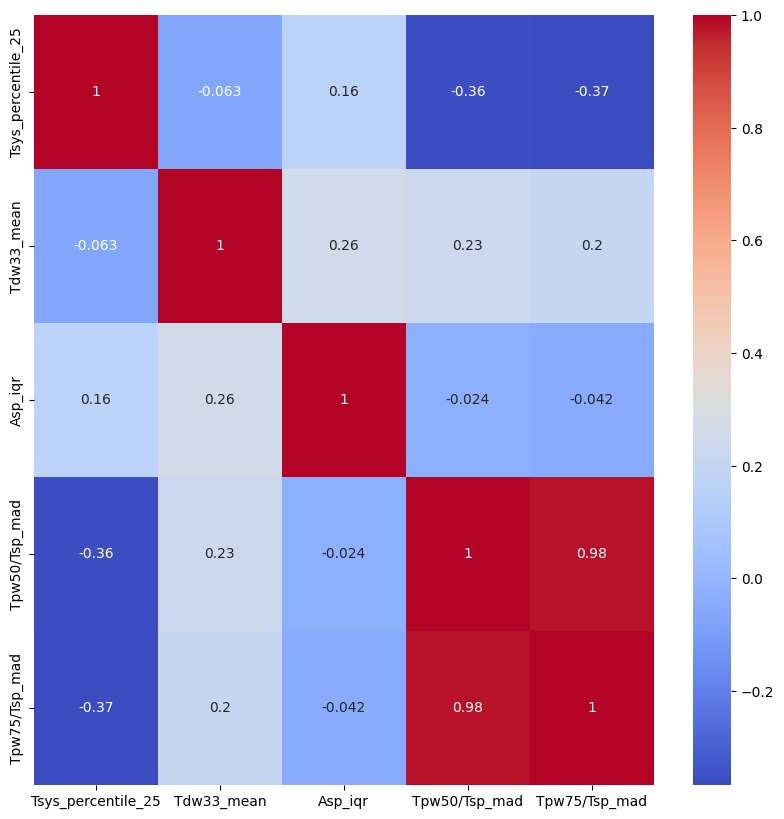

In [48]:
# plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data[f1].corr(), annot=True, cmap='coolwarm')

<AxesSubplot: >

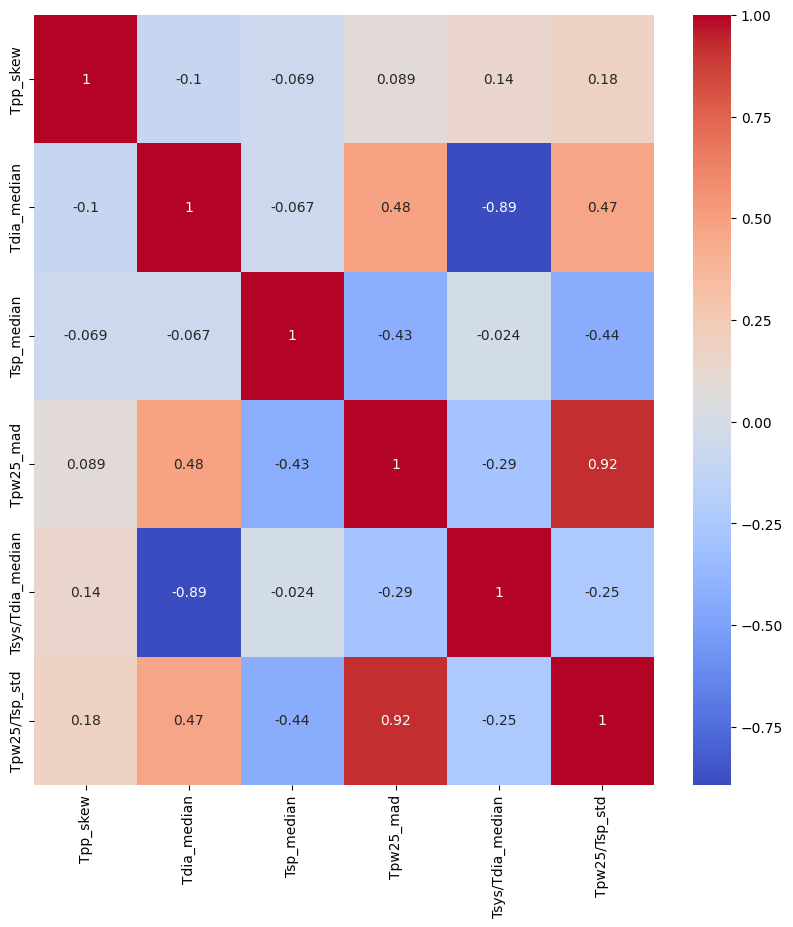

In [49]:
# plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data[f2].corr(), annot=True, cmap='coolwarm')

<AxesSubplot: >

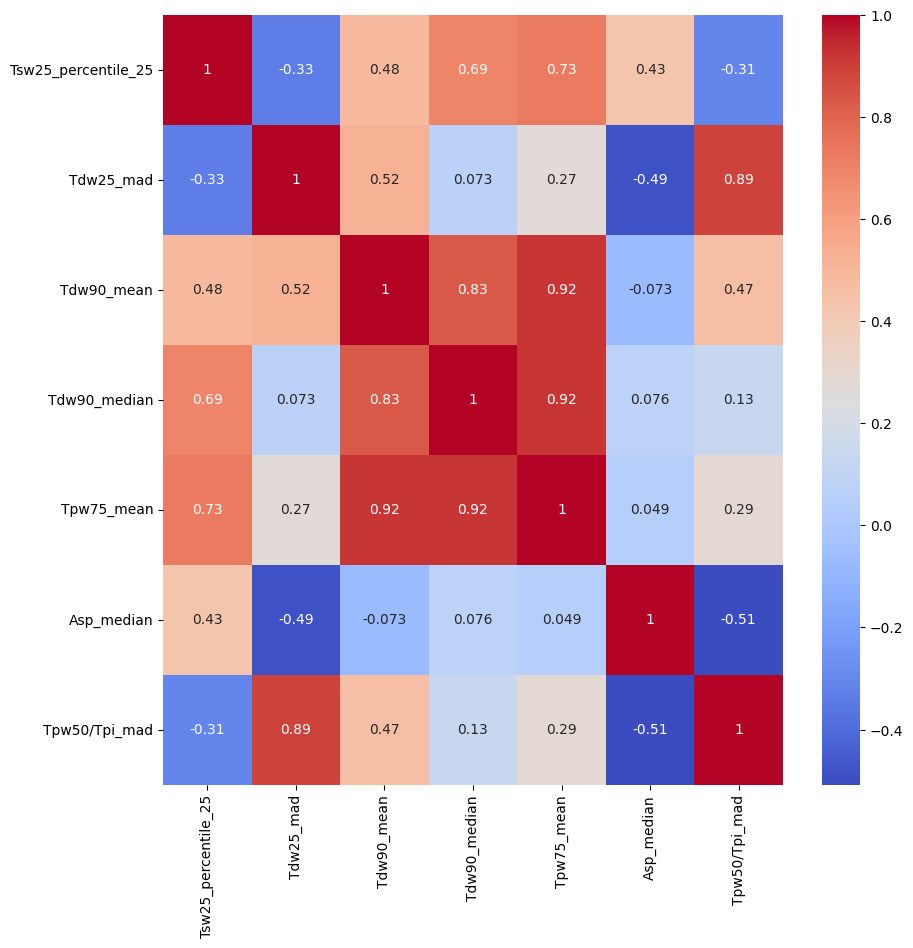

In [50]:
# plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data[f3].corr(), annot=True, cmap='coolwarm')

<AxesSubplot: >

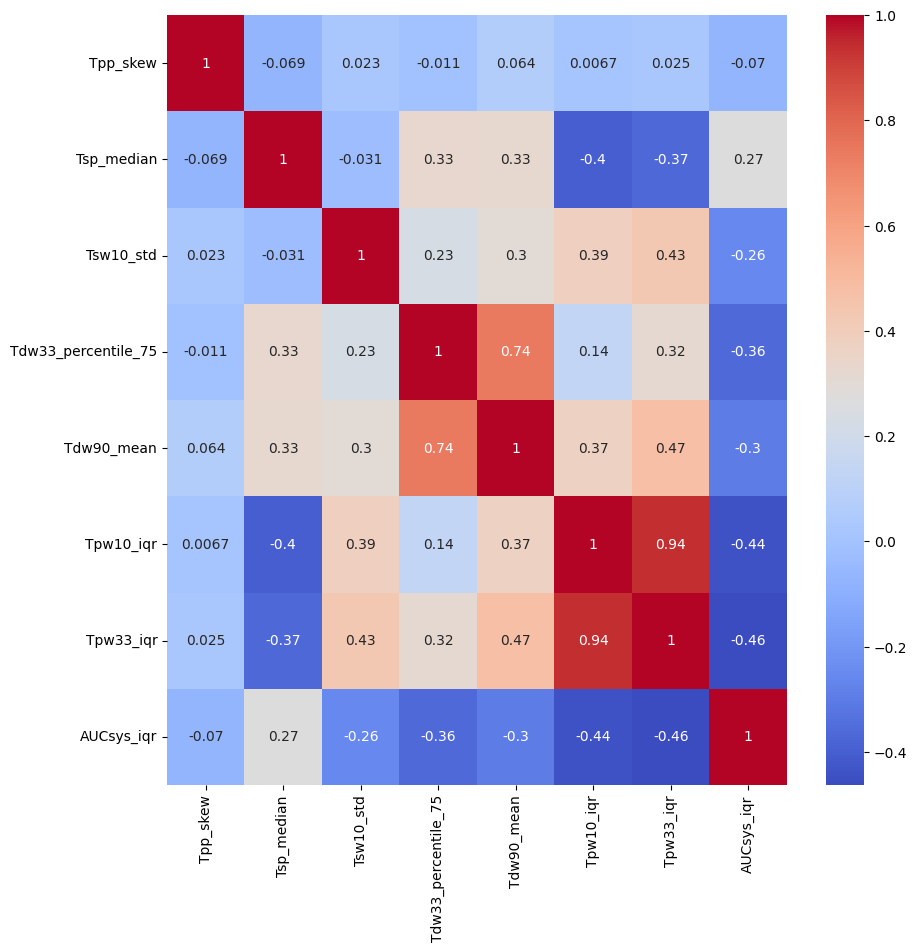

In [51]:
# plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data[f4].corr(), annot=True, cmap='coolwarm')